In [145]:
# Import required libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-white')
from sklearn.linear_model import RidgeCV

In [146]:
# Open the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('polynomial50.csv')

In [147]:
# Assign the values of the 'x' column as the predictor
x = df[['x']].values

# Assign the values of the 'y' column as the response
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 
f = df['f'].values

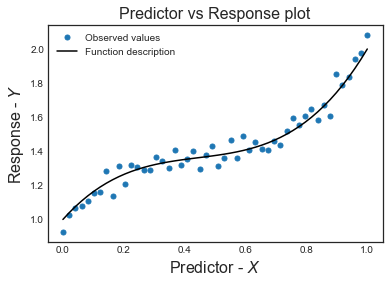

In [148]:
# Visualise the distribution of the x, y values & also the value of the true function f
fig, ax = plt.subplots()
# Plot x vs y values
ax.plot(x,y, '.', label = 'Observed values',markersize=10)
# Plot x vs true function value
ax.plot(x,f, 'k-', label = 'Function description')
ax.legend(loc = 'best');
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);

In [149]:
alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]
degree= 30
    
def reg_with_validation(rs):
    # Split the data into train and validation sets 

    x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8,random_state=rs)

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features train and validation sets
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    x_poly_val= PolynomialFeatures(degree).fit_transform(x_val)

    for alpha in alphas:

        # For each i, fit a ridge regression on training set
        ridge_reg = Ridge(fit_intercept=False, alpha=alpha)
        ridge_reg.fit(x_poly_train,y_train)

        # Predict on the validation set 
        y_train_pred = ridge_reg.predict(x_poly_train)
        y_val_pred = ridge_reg.predict(x_poly_val)
        # Compute the training and validation errors
        mse_train = mean_squared_error(y_train, y_train_pred) 
        mse_val = mean_squared_error(y_val, y_val_pred)

        # Add that value to the list 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    return training_error, validation_error


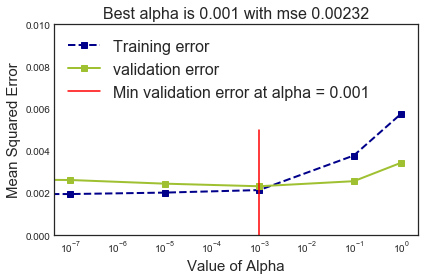

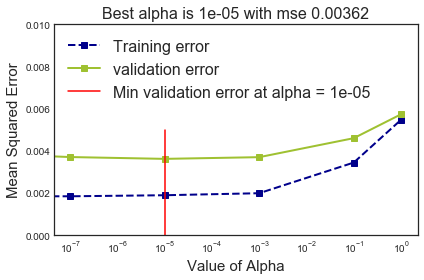

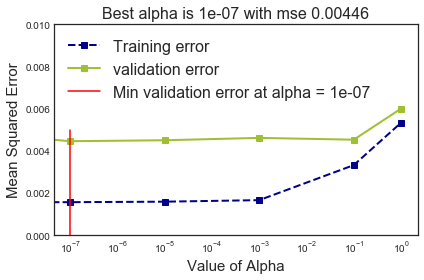

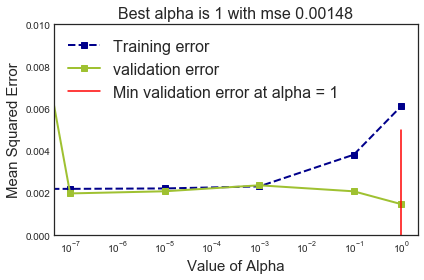

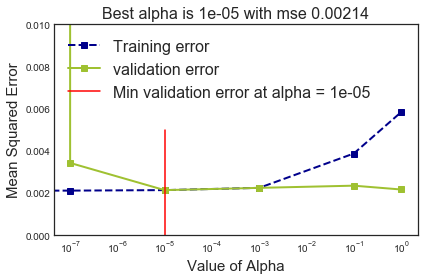

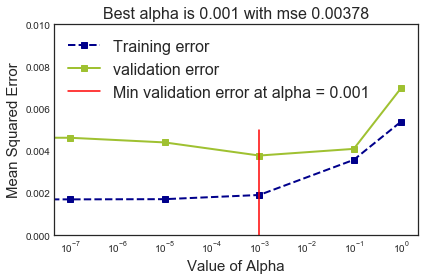

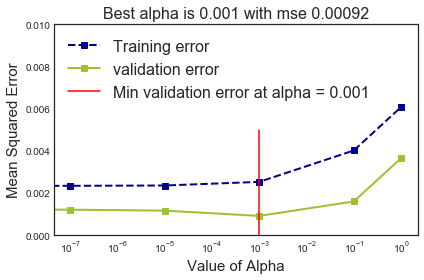

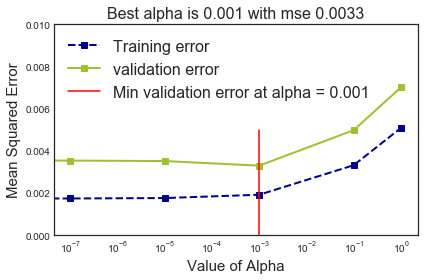

In [150]:
# Find the best value of hyper parameter, which gives the least error on the validation data

ran_state = [0, 10, 21, 42, 66, 109, 310, 1996]


for i in range(len(ran_state)):
    training_error, validation_error = reg_with_validation(ran_state[i])

    best_mse  = min(validation_error)
    best_parameter = alphas[validation_error.index(best_mse)]

    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.set_ylim([0,0.010])
    ax.legend(loc = 'upper left',fontsize=16)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()

In [151]:
degree = 30

# Create two lists for training and validation error
training_error, validation_error = [],[]


# Compute the polynomial features train and validation sets
x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
x_poly_val= PolynomialFeatures(degree).fit_transform(x_val)
    

# Ridge model with cross validation
ridge = RidgeCV(alphas=[0.0, 1e-7,1e-5, 1e-3, 0.1,1],cv=10, fit_intercept=False, scoring="neg_mean_squared_error")

# Fit the model on the train data
ridge.fit(x_poly_train, y_train) 

# Predict on the train data
y_train_pred = ridge.predict(x_poly_train)

# Predict on the validation data
y_val_pred = ridge.predict(x_poly_val)

# Compute the train and test MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# The best alpha for the ridge model
best_alpha = ridge.alpha_

In [152]:
# Print the validation MSE
print(f"The best alpha is {best_alpha} and has a validation MSE of {val_mse}")

The best alpha is 0.001 and has a validation MSE of 0.002369149910514266
